## **Boxplot (Kutu Grafiği)**

> **BOXPLOT** : **Sayısal değişkeneleri ve sürekli değişkenleri görselleştirmek amacıyla kullanılır .**

> Ayrıca histogram ile eşit ağırlığa sahiptir yani sayısal bir değişkennin dağılımı incelendiğinde mutlaka histogram grafiğine de göz atmalıyız.

**Veri Seti Hikayesi**

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [17]:
#merak
# alt kartili (25%) tablodaki gibi bulunuz ?
# 244+1/4 = 61,.25
# demekki total_bill verileri küçükten büyüğe doğru sıralandığında 1.kartil 61-62.satırlardaki değer

df["total_bill"].sort_values().head(62)

67      3.07
92      5.75
111     7.25
172     7.25
149     7.51
       ...  
151    13.13
139    13.16
213    13.27
228    13.28
26     13.37
Name: total_bill, Length: 62, dtype: float64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [24]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [25]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [26]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [27]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Kutu Grafiğinin Oluşturulması (Boxplot)

* Boxplot, **kartiller aracılığıyla** çok değerli bilgi sunan görselleştirme tekniğidir

![alt text](Boxplot-Normal-Dağılım-1.jpg)

In [145]:
?sns.boxplot

Signature:
sns.boxplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A 

> **Syntax** : seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)

> **KUTU GRAFİĞİ PARAMETRELERİ**:  
* <span style='color:red'>x, y, hue</span> : Uzun biçimli verileri çizmek için girişler. 
* <span style='color:red'>data</span> : Çizim için veri seti. x ve y yoksa, bu geniş biçimli olarak yorumlanır. 
* <span style='color:red'>color</span> : Tüm elementler için renk.

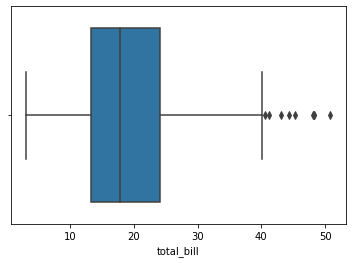

In [144]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

sns.boxplot(x = df["total_bill"]);

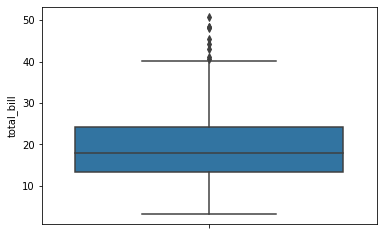

In [157]:
sns.boxplot(y = df["total_bill"]);

## Kutu Grafiği Çaprazlamalar

In [149]:
# hangi günler daha fazla kazanıyoruz ?

import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


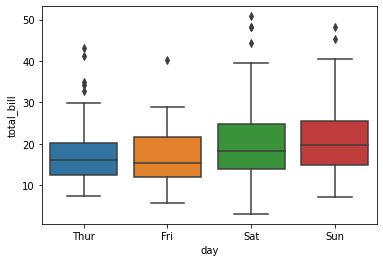

In [49]:
sns.boxplot(y = "total_bill", x = "day", data=df);

* Cumartesi günü gelen müşteri sayısı diğerlerine göre daha fazl olmasına rağmen en çok gelir pazar günü olduğu görülüyor.

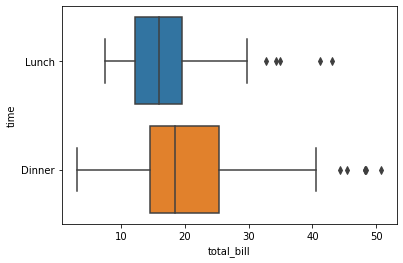

In [64]:
# sabah mı akşam mı daha çok kazanıyoruz ?

sns.boxplot(x = "total_bill", y = "time", data=df);

* grafiğe baktığımızda akşam yemeklerinde daha fazla gelirin olduğunu gözlemleyebiliyoruz.

* o zaman restoran sahibi şunu düşünmelidir; en kaliteli,müşterilerle ilgilenmesini bilen,deneyimli çalışanları haftasonu ve akşamları görevlendirirse daha fazla gelir elde edebilir.

In [63]:
# kanıt
df.groupby("time")[["total_bill"]].sum()

,total_bill
time,
Lunch,1167.47
Dinner,3660.30


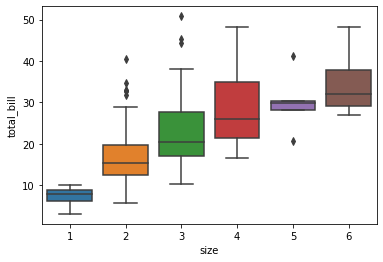

In [68]:
# kişi sayısı kazanç

sns.boxplot(y = "total_bill", x = "size", data=df);

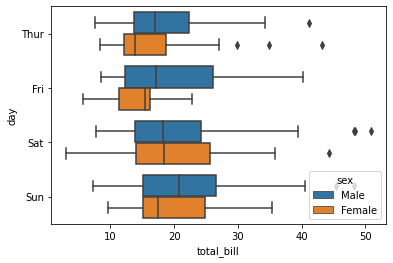

In [154]:
# gün ve cinsiyet faktörüne göre elde edilen geliri kutu grafiği ile gösterilmesi.

sns.boxplot(x = "total_bill", y = "day", hue = "sex" , data=df);

## Violin Grafiğinin Oluşturulması (Violin)

**VİOLİN**

> **Violin plot (keman grafiği) sayısal değerler için birden fazla istatistiksel çıkarım yapmamızı sağlayan hem box plot (kutu grafiği) hem de kernel density plotun (yoğunluk grafiği) bir karışımıdır.**

In [175]:
?sns.violinplot

Signature:
sns.violinplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    bw='scott',
    cut=2,
    scale='area',
    scale_hue=True,
    gridsize=100,
    width=0.8,
    inner='box',
    split=False,
    dodge=True,
    orient=None,
    linewidth=None,
    color=None,
    palette=None,
    saturation=0.75,
    ax=None,
    **kwargs,
)
Docstring:
Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the
distribution of quantitative data across several levels of one (or more)
categorical variables such that those distributions can be compared. Unlike
a box plot, in which all of the plot components correspond to actual
datapoints, the violin plot features a kernel density estimation of the
underlying distribution.

This can be an effective and attractive way to show multiple distributions
of data at once, but keep in mind that the estimation procedure is
infl

In [162]:
?sns.catplot

Signature:
sns.catplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    row=None,
    col=None,
    col_wrap=None,
    estimator=<function mean at 0x000001F05BB23EE0>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    kind='strip',
    height=5,
    aspect=1,
    orient=None,
    color=None,
    palette=None,
    legend=True,
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The ``kind``
parameter selects the underlying axes-level function to use:

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplo

>seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw=’scott’, cut=2, scale=’area’, scale_hue=True, gridsize=100, width=0.8, inner=’box’, split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)

**VİOLİN GRAFİĞİ PARAMETRELERİ:** 
* <span style='color:red'>x, y, hue</span> : Uzun biçimli verileri çizmek için girişler. 
* <span style='color:red'>data</span> : Çizim için veri seti. 
* <span style='color:red'>scale</span> : Her kemanın genişliğini ölçeklemek için kullanılan yöntem.

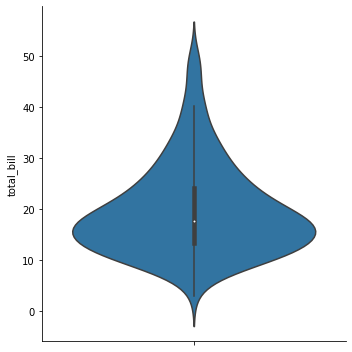

In [177]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

> **Violin plot'da grafiğe yatay olarakb baktığımızda yoğunluk grafiğine ait özellikler görürken , grafiğe dikey olarak baktığımızda box plot'un özelliklerinden yararlanıldığını gözlemlemekteyiz.**

![alt text](violin.jpg)

## Violin Grafik Çaprazlanma

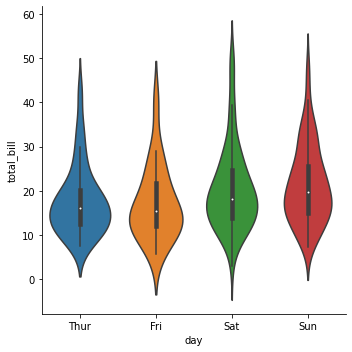

In [84]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df);

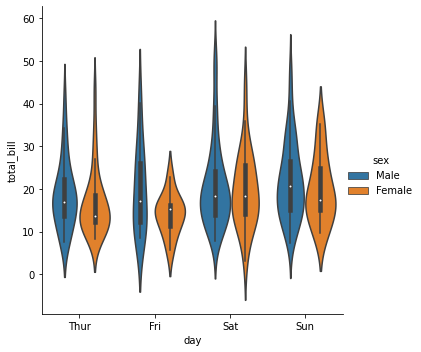

In [174]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin",data = df);